# NN

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10

# 1. CIFAR10 데이터셋 임포트
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=10)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.8950 - accuracy: 0.3245
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7126 - accuracy: 0.3872
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6455 - accuracy: 0.4132
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5988 - accuracy: 0.4310
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5669 - accuracy: 0.4416
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5417 - accuracy: 0.4497
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5293 - accuracy: 0.4542
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5041 - accuracy: 0.4660
Epoch 9/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4921 - accuracy: 0.46

# CNN

In [10]:
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
# from keras.utils import np_utils -> to_categorical로 변경
from keras.utils import to_categorical
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# 필요한 층들을 가지고 있는 layers 라이브러리
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow

### 데이터 로드 및 전처리

170498071/170498071 [==============================] - 4s 0us/step
x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


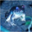

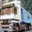

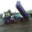

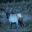

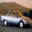

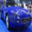

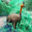

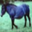

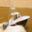

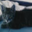

In [11]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [12]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


### 모델 구성 및 컴파일

In [ ]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                  

### 모델 학습 및 평가

In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 16s 6ms/step - loss: 2.0523 - accuracy: 0.2432 - val_loss: 1.9057 - val_accuracy: 0.3054
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6306 - accuracy: 0.4160 - val_loss: 1.5483 - val_accuracy: 0.4431
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4412 - accuracy: 0.4871 - val_loss: 1.4444 - val_accuracy: 0.4826
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3163 - accuracy: 0.5310 - val_loss: 1.3819 - val_accuracy: 0.5028
Epoch 5/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2118 - accuracy: 0.5713 - val_loss: 1.2088 - val_accuracy: 0.5715
Epoch 6/30
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1133 - accuracy: 0.6067 - val_loss: 1.1300 - val_accuracy: 0.5934
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0321 - accuracy: 0.6372 - val_loss: 1.1273 - val_acc

### 학습 과정 시각화

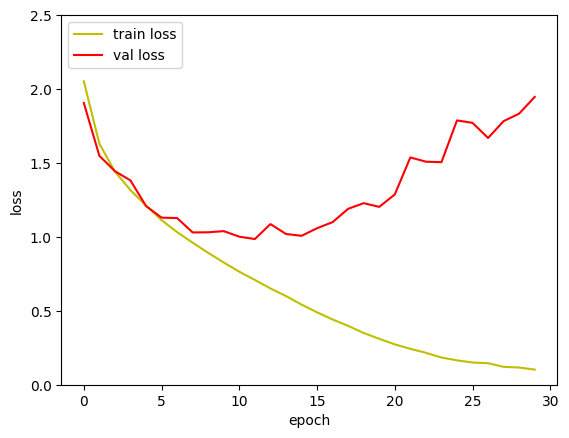

In [ ]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

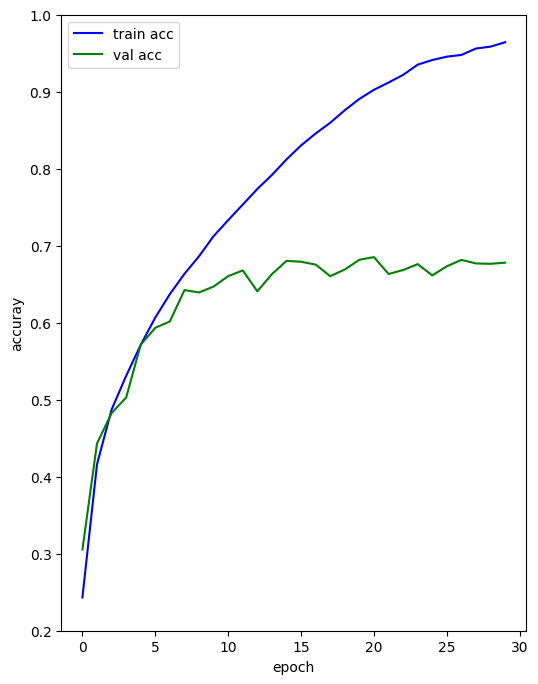

In [ ]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기
plt.figure(figsize=(6,8))
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.2, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()

#### batch size: 32 -> 16

In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=16,
                 validation_data=(x_test, y_test))

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.3629 - accuracy: 0.8708 - val_loss: 1.3716 - val_accuracy: 0.6687
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.2828 - accuracy: 0.8984 - val_loss: 1.5039 - val_accuracy: 0.6670
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.2424 - accuracy: 0.9127 - val_loss: 1.5362 - val_accuracy: 0.6672
Epoch 4/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.2139 - accuracy: 0.9237 - val_loss: 1.4999 - val_accuracy: 0.6735
Epoch 5/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.1889 - accuracy: 0.9331 - val_loss: 1.4984 - val_accuracy: 0.6816
Epoch 6/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.1746 - accuracy: 0.9385 - val_loss: 1.6529 - val_accuracy: 0.6771
Epoch 7/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.1607 - accuracy: 0.9424 - val_loss: 1.6490 - val_ac

#### batch size: 32 -> 16, activation: relu -> tanh

In [ ]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='tanh',
                 input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='tanh'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                  

In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=20,
                 batch_size=16,
                 validation_data=(x_test, y_test))

Epoch 1/20
3125/3125 [==============================] - 19s 6ms/step - loss: 1.6109 - accuracy: 0.4212 - val_loss: 1.2971 - val_accuracy: 0.5308
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1750 - accuracy: 0.5836 - val_loss: 1.0770 - val_accuracy: 0.6227
Epoch 3/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9628 - accuracy: 0.6617 - val_loss: 0.9319 - val_accuracy: 0.6716
Epoch 4/20
3125/3125 [==============================] - 18s 6ms/step - loss: 0.8335 - accuracy: 0.7093 - val_loss: 0.9025 - val_accuracy: 0.6834
Epoch 5/20
3125/3125 [==============================] - 17s 6ms/step - loss: 0.7292 - accuracy: 0.7482 - val_loss: 0.8022 - val_accuracy: 0.7225
Epoch 6/20
3125/3125 [==============================] - 17s 6ms/step - loss: 0.6442 - accuracy: 0.7778 - val_loss: 0.8268 - val_accuracy: 0.7148
Epoch 7/20
3125/3125 [==============================] - 17s 6ms/step - loss: 0.5707 - accuracy: 0.8061 - val_loss: 0.7678 - val_ac

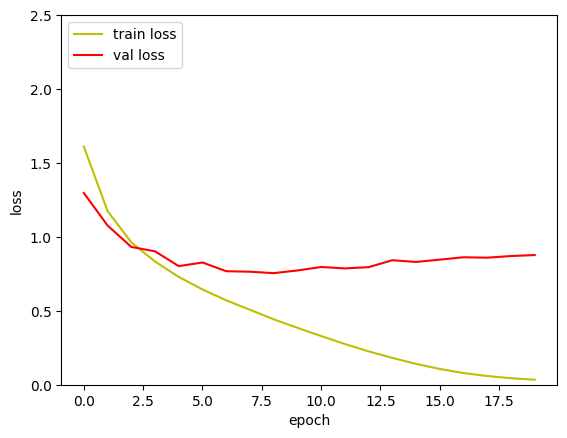

In [ ]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

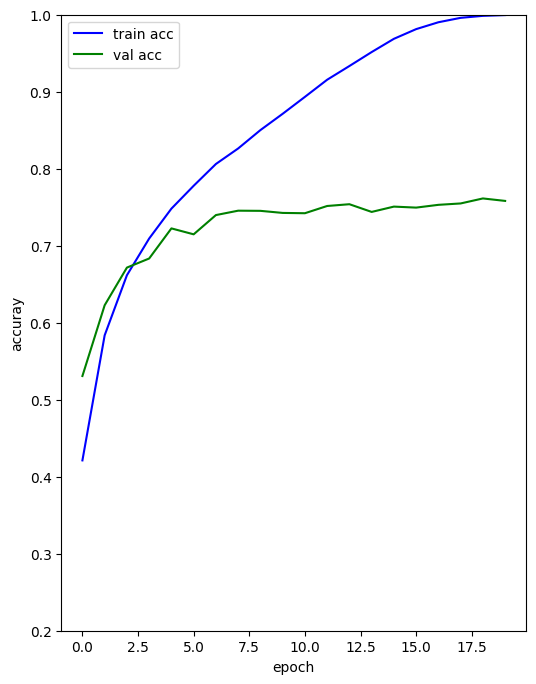

In [ ]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기
plt.figure(figsize=(6,8))
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.2, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()

#### batch size: 32 -> 16, activation: relu -> tanh, Conv2D 추가

In [ ]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='tanh',
                 input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='tanh'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                 

In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=20,
                 batch_size=16,
                 validation_data=(x_test, y_test))

Epoch 1/20
3125/3125 [==============================] - 24s 6ms/step - loss: 1.6107 - accuracy: 0.4162 - val_loss: 1.2868 - val_accuracy: 0.5376
Epoch 2/20
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1717 - accuracy: 0.5820 - val_loss: 1.0789 - val_accuracy: 0.6188
Epoch 3/20
3125/3125 [==============================] - 19s 6ms/step - loss: 0.9416 - accuracy: 0.6691 - val_loss: 0.8961 - val_accuracy: 0.6883
Epoch 4/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.7749 - accuracy: 0.7308 - val_loss: 0.8296 - val_accuracy: 0.7096
Epoch 5/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6435 - accuracy: 0.7787 - val_loss: 0.7944 - val_accuracy: 0.7272
Epoch 6/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.5294 - accuracy: 0.8204 - val_loss: 0.7544 - val_accuracy: 0.7394
Epoch 7/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.4290 - accuracy: 0.8584 - val_loss: 0.7665 - val_ac

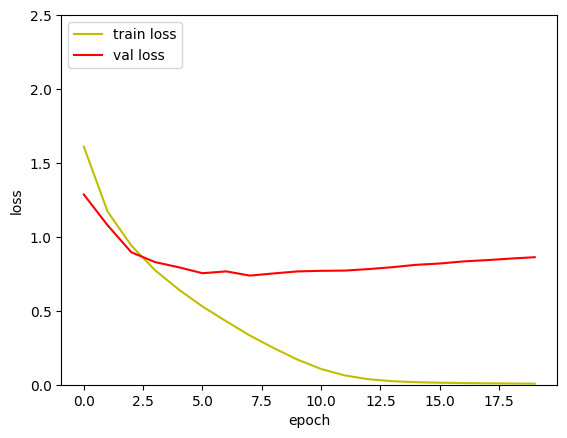

In [ ]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

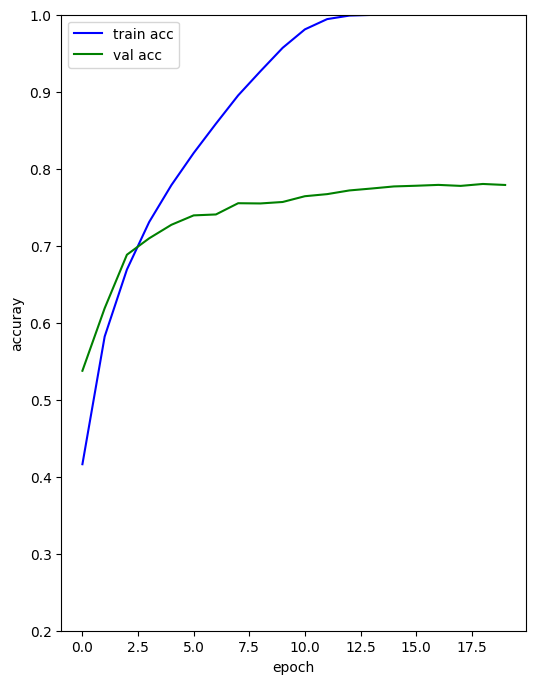

In [ ]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기
plt.figure(figsize=(6,8))
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.2, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()

### 모델 학습 및 평가

In [ ]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.8626 - accuracy: 0.7789
Test set Loss and Accuracy
[0.8625711798667908, 0.7789000272750854]


### 모델 사용하기

1/1 [==============================] - 1s 543ms/step
예측: 고양이 / 정답: 고양이


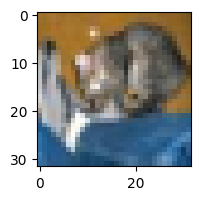

1/1 [==============================] - 0s 20ms/step
예측: 배 / 정답: 배


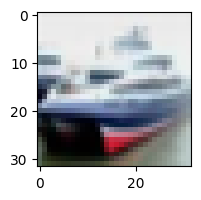

1/1 [==============================] - 0s 30ms/step
예측: 배 / 정답: 배


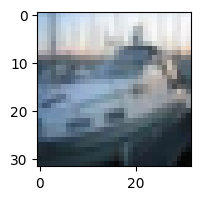

1/1 [==============================] - 0s 25ms/step
예측: 비행기 / 정답: 비행기


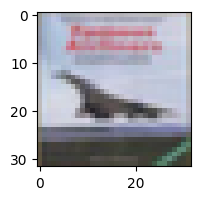

1/1 [==============================] - 0s 25ms/step
예측: 개구리 / 정답: 개구리


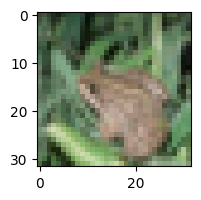

1/1 [==============================] - 0s 25ms/step
예측: 개구리 / 정답: 개구리


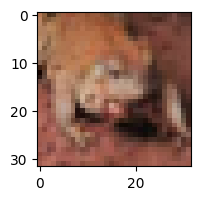

1/1 [==============================] - 0s 25ms/step
예측: 자동차 / 정답: 자동차


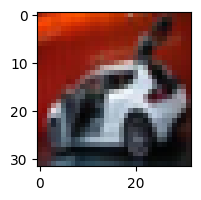

1/1 [==============================] - 0s 25ms/step
예측: 개구리 / 정답: 개구리


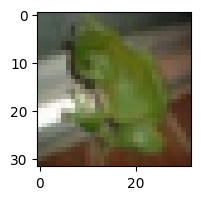

1/1 [==============================] - 0s 29ms/step
예측: 고양이 / 정답: 고양이


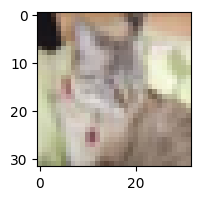

1/1 [==============================] - 0s 25ms/step
예측: 자동차 / 정답: 자동차


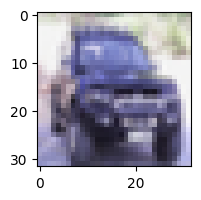

In [ ]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용
  output = model.predict(x_test[i].reshape(1,width, height, channel))

  # 이미지 출력
  plt.imshow(x_test[i].reshape(width, height, channel))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()

### Reference -> 돌려보기

In [13]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import BatchNormalization, Dropout

In [14]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model = Sequential(name='CIFAR10_CNN')
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(width, height, channel)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                       

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

hist = model.fit(x_train, y_train,
                 epochs=20,
                 batch_size=16,
                 validation_data=(x_test, y_test))

Epoch 1/20
3125/3125 [==============================] - 34s 9ms/step - loss: 2.0657 - accuracy: 0.2746 - val_loss: 1.9177 - val_accuracy: 0.3162
Epoch 2/20
3125/3125 [==============================] - 24s 8ms/step - loss: 1.8148 - accuracy: 0.3484 - val_loss: 1.7646 - val_accuracy: 0.3551
Epoch 3/20
3125/3125 [==============================] - 24s 8ms/step - loss: 1.6703 - accuracy: 0.3846 - val_loss: 1.6304 - val_accuracy: 0.3884
Epoch 4/20
3125/3125 [==============================] - 23s 7ms/step - loss: 1.5967 - accuracy: 0.4013 - val_loss: 1.5263 - val_accuracy: 0.4221
Epoch 5/20
3125/3125 [==============================] - 27s 9ms/step - loss: 1.5304 - accuracy: 0.4260 - val_loss: 1.6088 - val_accuracy: 0.4057
Epoch 6/20
3125/3125 [==============================] - 25s 8ms/step - loss: 1.4750 - accuracy: 0.4597 - val_loss: 1.4225 - val_accuracy: 0.4665
Epoch 7/20
3125/3125 [==============================] - 25s 8ms/step - loss: 1.4239 - accuracy: 0.4843 - val_loss: 1.3966 - val_ac

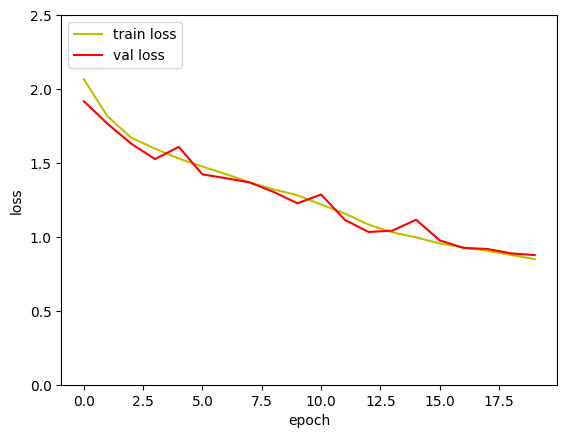

In [16]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

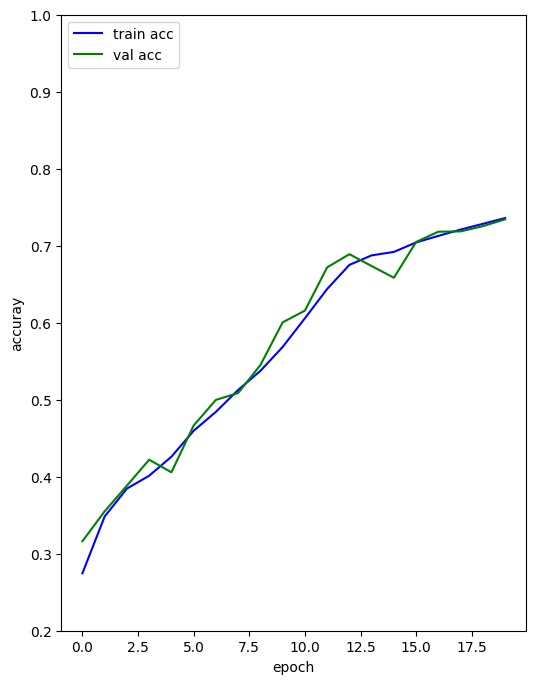

In [17]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기
plt.figure(figsize=(6,8))
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.2, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()